## Pandas
pandas consists of the following things
• A set of labeled array data structures, the primary of which are Series and DataFrame

• Index objects enabling both simple axis indexing and multi-level / hierarchical axis indexing

• An integrated group by engine for aggregating and transforming data sets

•Daterangegeneration(date_range)and custom date offsets enabling the implementation of customized frequen- cies

• Input/Output tools: loading tabular data from flat files (CSV, delimited, Excel 2003), and saving and loading pandas objects from the fast and efficient PyTables/HDF5 format.

• Memory-efficient “sparse” versions of the standard data structures for storing data that is mostly missing or mostly constant (some fixed value)

• Moving window statistics (rolling mean, rolling standard deviation, etc.)

• Static and moving window linear and panel regression


Data structures 

Series - 1 Dimension - 1D labeled homogeneously-typed array

DataFrame -- General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns

Panel  --General 3D labeled, also size-mutable array


The best way to think about the pandas data structures is as flexible containers for lower dimensional data. For example, DataFrame is a container for Series, and Panel is a container for DataFrame objects. We would like to be able to insert and remove objects from these containers in a dictionary-like fashion.


When using ndarrays to store 2- and 3-dimensional data, a burden is placed on the user to consider the orientation of the data set when writing functions; axes are considered more or less equivalent . In pandas, the axes are intended to lend more semantic meaning to the data; i.e., for a particular data set there is likely to be a “right” way to orient the data. The goal, then, is to reduce the amount of mental effort required to code up data transformations in downstream functions.

For example, with tabular data (DataFrame) it is more semantically helpful to think of the index (the rows) and the columns rather than axis 0 and axis 1. And iterating through the columns of the DataFrame thus results in more readable code:

￼for col in df.columns:

    series = df[col]
    
    do something with series￼for col in df.columns:



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Object Creation

Creating a Series by passing a list of values, letting pandas create a default integer index:

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.276899,-0.109495,0.185919,-0.292185
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846
2013-01-06,-0.614505,0.066831,1.397334,1.158483


In [6]:
## Creating a DataFrame by passing a dict of objects that can be converted to series-like.

df2 = pd.DataFrame({ 'A' : 1.,'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]), 
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Viewing Data

In [8]:
df.head()

,A,B,C,D
2013-01-01,1.276899,-0.109495,0.185919,-0.292185
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846
2013-01-06,-0.614505,0.066831,1.397334,1.158483


In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[ 1.27689918, -0.10949547,  0.18591862, -0.29218536],
       [-0.21249344, -0.17300882, -0.39139618, -1.06917193],
       [-1.13219172, -2.4312626 ,  0.83700157, -0.27424466],
       [ 1.86921835, -0.30822732, -2.52152208, -0.8224957 ],
       [-1.16269219, -0.30544868,  0.94567265, -1.49484611],
       [-0.61450451,  0.06683083,  1.39733413,  1.15848332]])

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.004039,-0.543435,0.075501,-0.465743
std,1.279127,0.935286,1.418382,0.922535
min,-1.162692,-2.431263,-2.521522,-1.494846
25%,-1.002770,-0.307533,-0.247067,-1.007503
50%,-0.413499,-0.239229,0.511460,-0.557341
75%,0.904551,-0.125374,0.918505,-0.278730
max,1.869218,0.066831,1.397334,1.158483


In [14]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.276899,-0.212493,-1.132192,1.869218,-1.162692,-0.614505
B,-0.109495,-0.173009,-2.431263,-0.308227,-0.305449,0.066831
C,0.185919,-0.391396,0.837002,-2.521522,0.945673,1.397334
D,-0.292185,-1.069172,-0.274245,-0.822496,-1.494846,1.158483


In [15]:
# Sorting by an axis

df.sort_index(axis =1 , ascending = False)



,D,C,B,A
2013-01-01,-0.292185,0.185919,-0.109495,1.276899
2013-01-02,-1.069172,-0.391396,-0.173009,-0.212493
2013-01-03,-0.274245,0.837002,-2.431263,-1.132192
2013-01-04,-0.822496,-2.521522,-0.308227,1.869218
2013-01-05,-1.494846,0.945673,-0.305449,-1.162692
2013-01-06,1.158483,1.397334,0.066831,-0.614505


In [16]:
# sorting by values 

df.sort_values(by ='B', ascending = True)

,A,B,C,D
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172
2013-01-01,1.276899,-0.109495,0.185919,-0.292185
2013-01-06,-0.614505,0.066831,1.397334,1.158483


### Selection 

#### Getting 

Selecting a single column, which yields a Series, equivalent to df.A

In [17]:
df['A']

2013-01-01    1.276899
2013-01-02   -0.212493
2013-01-03   -1.132192
2013-01-04    1.869218
2013-01-05   -1.162692
2013-01-06   -0.614505
Freq: D, Name: A, dtype: float64

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,1.276899,-0.109495,0.185919,-0.292185
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245


In [19]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496


####  Selection by Label

In [20]:
df

,A,B,C,D
2013-01-01,1.276899,-0.109495,0.185919,-0.292185
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846
2013-01-06,-0.614505,0.066831,1.397334,1.158483


In [21]:
df.loc[dates[0]]

A    1.276899
B   -0.109495
C    0.185919
D   -0.292185
Name: 2013-01-01 00:00:00, dtype: float64

In [22]:
df.loc[dates[1]]

A   -0.212493
B   -0.173009
C   -0.391396
D   -1.069172
Name: 2013-01-02 00:00:00, dtype: float64

In [23]:
## Selecting on a multi-axis by label

df.loc[:,['A','B']]

,A,B
2013-01-01,1.276899,-0.109495
2013-01-02,-0.212493,-0.173009
2013-01-03,-1.132192,-2.431263
2013-01-04,1.869218,-0.308227
2013-01-05,-1.162692,-0.305449
2013-01-06,-0.614505,0.066831


In [24]:
#label slicing, both endpoints are included

df.loc['20130101': '20130104',['A','B']]

,A,B
2013-01-01,1.276899,-0.109495
2013-01-02,-0.212493,-0.173009
2013-01-03,-1.132192,-2.431263
2013-01-04,1.869218,-0.308227


In [25]:
print(type(df.loc['20130101': '20130104',['A','B']]))
# Reduction in the dimensions of the returned object

df.loc['20130102',['A','B']]

print(df.loc['20130102',['A','B']])

print(type(df.loc['20130102',['A','B']]))



<class 'pandas.core.frame.DataFrame'>
A   -0.212493
B   -0.173009
Name: 2013-01-02 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>


In [26]:
# For getting a scalar value
df.loc[dates[0],'A']

1.2768991768468816

In [27]:
# For getting fast access to a scalar (equiv to the prior method)

df.at[dates[0],'A']

1.2768991768468816

#### Selection by Position

In [28]:
df.iloc[3]

A    1.869218
B   -0.308227
C   -2.521522
D   -0.822496
Name: 2013-01-04 00:00:00, dtype: float64

In [29]:
# By integer slices, acting similar to numpy/python

df.iloc[3:5,0:2]


,A,B
2013-01-04,1.869218,-0.308227
2013-01-05,-1.162692,-0.305449


In [30]:
df.iloc[3:5]

,A,B,C,D
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846


In [31]:
df.iloc[:,2:5]


,C,D
2013-01-01,0.185919,-0.292185
2013-01-02,-0.391396,-1.069172
2013-01-03,0.837002,-0.274245
2013-01-04,-2.521522,-0.822496
2013-01-05,0.945673,-1.494846
2013-01-06,1.397334,1.158483


In [32]:
df.iloc[:,2:6]

,C,D
2013-01-01,0.185919,-0.292185
2013-01-02,-0.391396,-1.069172
2013-01-03,0.837002,-0.274245
2013-01-04,-2.521522,-0.822496
2013-01-05,0.945673,-1.494846
2013-01-06,1.397334,1.158483


In [33]:
df.iloc[1:9,:]

,A,B,C,D
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846
2013-01-06,-0.614505,0.066831,1.397334,1.158483


In [34]:
## By lists of integer position locations, similar to the numpy/python style

df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.212493,-0.391396
2013-01-03,-1.132192,0.837002
2013-01-05,-1.162692,0.945673


In [35]:
df.iloc[[1,2,7],[0,2]]

IndexError: positional indexers are out-of-bounds

In [36]:
# For getting a value explicitly
df.iloc[1,1]

-0.17300881530397774

#### Boolean Indexing

In [37]:
df

,A,B,C,D
2013-01-01,1.276899,-0.109495,0.185919,-0.292185
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846
2013-01-06,-0.614505,0.066831,1.397334,1.158483


In [38]:
df[df.A >0]

,A,B,C,D
2013-01-01,1.276899,-0.109495,0.185919,-0.292185
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496


In [39]:
df[df >0]

,A,B,C,D
2013-01-01,1.276899,NaN,0.185919,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,0.837002,NaN
2013-01-04,1.869218,NaN,NaN,NaN
2013-01-05,NaN,NaN,0.945673,NaN
2013-01-06,NaN,0.066831,1.397334,1.158483


In [40]:
### Using the isin() method for filtering:

df2 = df.copy()

In [41]:
df2

,A,B,C,D
2013-01-01,1.276899,-0.109495,0.185919,-0.292185
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846
2013-01-06,-0.614505,0.066831,1.397334,1.158483


In [42]:
df2['E'] = ['one', 'one','two','three','1','2']
df2

,A,B,C,D,E
2013-01-01,1.276899,-0.109495,0.185919,-0.292185,one
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172,one
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245,two
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496,three
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846,1
2013-01-06,-0.614505,0.066831,1.397334,1.158483,2


In [43]:
df

,A,B,C,D
2013-01-01,1.276899,-0.109495,0.185919,-0.292185
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846
2013-01-06,-0.614505,0.066831,1.397334,1.158483


df2


In [44]:
df2[~df2['E'].isin(['one','three']) ]


,A,B,C,D,E
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245,two
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846,1
2013-01-06,-0.614505,0.066831,1.397334,1.158483,2


#### Setting 

Setting a new column automatically aligns the data by the indexes

In [45]:
s1 = pd.Series([1,2,3,4,5,6], index = pd.date_range('20130102', periods =6))
s1


2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
# setting values by label 
df['F'] = s1

In [47]:
df


,A,B,C,D,F
2013-01-01,1.276899,-0.109495,0.185919,-0.292185,NaN
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172,1.0
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245,2.0
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496,3.0
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846,4.0
2013-01-06,-0.614505,0.066831,1.397334,1.158483,5.0


In [48]:
# Setting values by label

df.at[dates[0],'A'] =0

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,-0.109495,0.185919,-0.292185,NaN
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172,1.0
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245,2.0
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496,3.0
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846,4.0
2013-01-06,-0.614505,0.066831,1.397334,1.158483,5.0


In [50]:
#Setting values by position
df.iat[0,2] = 0

In [51]:
df


,A,B,C,D,F
2013-01-01,0.000000,-0.109495,0.000000,-0.292185,NaN
2013-01-02,-0.212493,-0.173009,-0.391396,-1.069172,1.0
2013-01-03,-1.132192,-2.431263,0.837002,-0.274245,2.0
2013-01-04,1.869218,-0.308227,-2.521522,-0.822496,3.0
2013-01-05,-1.162692,-0.305449,0.945673,-1.494846,4.0
2013-01-06,-0.614505,0.066831,1.397334,1.158483,5.0


In [52]:
#Setting by assigning with a numpy array

df.loc[:,'D'] = np.array([3]*len(df))

In [53]:
df

,A,B,C,D,F
2013-01-01,0.000000,-0.109495,0.000000,3,NaN
2013-01-02,-0.212493,-0.173009,-0.391396,3,1.0
2013-01-03,-1.132192,-2.431263,0.837002,3,2.0
2013-01-04,1.869218,-0.308227,-2.521522,3,3.0
2013-01-05,-1.162692,-0.305449,0.945673,3,4.0
2013-01-06,-0.614505,0.066831,1.397334,3,5.0


In [54]:
df2 = df.copy


In [55]:
df2
            

<bound method NDFrame.copy of                    A         B         C  D    F
2013-01-01  0.000000 -0.109495  0.000000  3  NaN
2013-01-02 -0.212493 -0.173009 -0.391396  3  1.0
2013-01-03 -1.132192 -2.431263  0.837002  3  2.0
2013-01-04  1.869218 -0.308227 -2.521522  3  3.0
2013-01-05 -1.162692 -0.305449  0.945673  3  4.0
2013-01-06 -0.614505  0.066831  1.397334  3  5.0>

In [56]:
df2[df2 > 0 ] 

TypeError: '>' not supported between instances of 'method' and 'int'

#### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [57]:
df1 = df.reindex(index = dates[0:4], columns= list(df.columns)+['E'])


In [58]:

df1.loc[dates[0]:dates[1],'E'] = 1
print(df1)

                   A         B         C  D    F    E
2013-01-01  0.000000 -0.109495  0.000000  3  NaN  1.0
2013-01-02 -0.212493 -0.173009 -0.391396  3  1.0  1.0
2013-01-03 -1.132192 -2.431263  0.837002  3  2.0  NaN
2013-01-04  1.869218 -0.308227 -2.521522  3  3.0  NaN


In [59]:
# To drop any rows that have missing data.
df1.dropna(how = 'any')

,A,B,C,D,F,E
2013-01-02,-0.212493,-0.173009,-0.391396,3,1.0,1.0


In [60]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,-0.109495,0.000000,3,5.0,1.0
2013-01-02,-0.212493,-0.173009,-0.391396,3,1.0,1.0
2013-01-03,-1.132192,-2.431263,0.837002,3,2.0,5.0
2013-01-04,1.869218,-0.308227,-2.521522,3,3.0,5.0


In [61]:
df1.dropna(how = 'any')

,A,B,C,D,F,E
2013-01-02,-0.212493,-0.173009,-0.391396,3,1.0,1.0


In [62]:
# To get the boolean mask where values are nan

pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


#### Operations 
Operations in general exclude missing data. 

Performing a descriptive statistic

In [63]:
df.mean()

A   -0.208777
B   -0.543435
C    0.044515
D    3.000000
F    3.000000
dtype: float64

In [64]:
# Same operation on the other axis

df.mean(1)

2013-01-01    0.722626
2013-01-02    0.644620
2013-01-03    0.454709
2013-01-04    1.007894
2013-01-05    1.295506
2013-01-06    1.769932
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [65]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [66]:
s= s.shift(2)
s


2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [67]:
type(s)
print(s.shape)

print(df.shape)

(6,)
(6, 5)


In [68]:
help(df.sub)


Help on method sub in module pandas.core.ops:

sub(other, axis='columns', level=None, fill_value=None) method of pandas.core.frame.DataFrame instance
    Subtraction of dataframe and other, element-wise (binary operator `sub`).
    
    Equivalent to ``dataframe - other``, but with support to substitute a fill_value for
    missing data in one of the inputs.
    
    Parameters
    ----------
    other : Series, DataFrame, or constant
    axis : {0, 1, 'index', 'columns'}
        For Series input, axis to match Series index on
    level : int or name
        Broadcast across a level, matching Index values on the
        passed MultiIndex level
    fill_value : None or float value, default None
        Fill existing missing (NaN) values, and any new element needed for
        successful DataFrame alignment, with this value before computation.
        If data in both corresponding DataFrame locations is missing
        the result will be missing
    
    Notes
    -----
    Mismatched in

In [69]:
df


,A,B,C,D,F
2013-01-01,0.000000,-0.109495,0.000000,3,NaN
2013-01-02,-0.212493,-0.173009,-0.391396,3,1.0
2013-01-03,-1.132192,-2.431263,0.837002,3,2.0
2013-01-04,1.869218,-0.308227,-2.521522,3,3.0
2013-01-05,-1.162692,-0.305449,0.945673,3,4.0
2013-01-06,-0.614505,0.066831,1.397334,3,5.0


In [70]:

df.sub(s,axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.132192,-3.431263,-0.162998,2.0,1.0
2013-01-04,-1.130782,-3.308227,-5.521522,0.0,0.0
2013-01-05,-6.162692,-5.305449,-4.054327,-2.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


#### Apply 

Applying function to data

In [71]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,-0.109495,0.000000,3,NaN
2013-01-02,-0.212493,-0.282504,-0.391396,6,1.0
2013-01-03,-1.344685,-2.713767,0.445605,9,3.0
2013-01-04,0.524533,-3.021994,-2.075917,12,6.0
2013-01-05,-0.638159,-3.327443,-1.130244,15,10.0
2013-01-06,-1.252664,-3.260612,0.267090,18,15.0


In [72]:
df.apply (lambda x : x.max()-x.min())

A    3.031911
B    2.498093
C    3.918856
D    0.000000
F    4.000000
dtype: float64

In [73]:
type(df.apply (lambda x : x.max()-x.min()))

pandas.core.series.Series

#### Histrogramming 

In [100]:
s = pd.Series(np.random.randint(0,7, size =10))
s


0    2
1    4
2    2
3    3
4    0
5    4
6    6
7    4
8    2
9    5
dtype: int64

In [102]:
s.value_counts()

4    3
2    3
6    1
5    1
3    1
0    1
dtype: int64

####  String methods

In [76]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [104]:
s.str.lower()

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

#### merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [106]:
df  = pd.DataFrame(np.random.randn(10,4))

In [107]:
df


,0,1,2,3
0,0.648579,0.081475,0.863650,-0.423025
1,0.739495,0.861191,-0.683689,-0.223619
2,-1.472713,0.285724,1.112563,-0.506451
3,-0.489653,-1.204584,-0.379523,1.201549
4,-1.174132,-0.364110,0.425982,-0.703044
5,0.224267,-2.911282,0.022705,-2.365831
6,-1.508514,-1.539149,1.006347,0.293495
7,-2.356421,-0.568575,0.238044,1.516159
8,-1.116221,0.483182,-0.581333,-0.084773
9,0.070915,-0.288107,-0.799765,-0.984085


In [109]:
piceses =  [df[:3],df[3:7],df[7:]]

In [110]:
piceses

[          0         1         2         3
 0  0.648579  0.081475  0.863650 -0.423025
 1  0.739495  0.861191 -0.683689 -0.223619
 2 -1.472713  0.285724  1.112563 -0.506451,
           0         1         2         3
 3 -0.489653 -1.204584 -0.379523  1.201549
 4 -1.174132 -0.364110  0.425982 -0.703044
 5  0.224267 -2.911282  0.022705 -2.365831
 6 -1.508514 -1.539149  1.006347  0.293495,
           0         1         2         3
 7 -2.356421 -0.568575  0.238044  1.516159
 8 -1.116221  0.483182 -0.581333 -0.084773
 9  0.070915 -0.288107 -0.799765 -0.984085]

In [111]:
pd.concat(piceses)

,0,1,2,3
0,0.648579,0.081475,0.863650,-0.423025
1,0.739495,0.861191,-0.683689,-0.223619
2,-1.472713,0.285724,1.112563,-0.506451
3,-0.489653,-1.204584,-0.379523,1.201549
4,-1.174132,-0.364110,0.425982,-0.703044
5,0.224267,-2.911282,0.022705,-2.365831
6,-1.508514,-1.539149,1.006347,0.293495
7,-2.356421,-0.568575,0.238044,1.516159
8,-1.116221,0.483182,-0.581333,-0.084773
9,0.070915,-0.288107,-0.799765,-0.984085


#### Join



In [83]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [112]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [113]:
pd.merge(left,right, on ='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Append

In [116]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-2.373118,-0.667441,-1.076027,1.999044
1,-0.472233,-0.393515,-0.841368,-1.170706
2,1.099845,-0.256751,-1.449785,1.933530
3,-0.598786,-0.125511,0.644743,-0.773127
4,1.621941,-0.430988,-0.983156,-0.953190
5,1.921995,-0.133554,-0.673031,0.960254
6,-0.234182,0.102279,-0.731169,-0.476145
7,0.297371,1.654612,-1.434577,0.913156


In [119]:
s = df.iloc[3]
s


A   -0.598786
B   -0.125511
C    0.644743
D   -0.773127
Name: 3, dtype: float64

In [120]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-2.373118,-0.667441,-1.076027,1.999044
1,-0.472233,-0.393515,-0.841368,-1.170706
2,1.099845,-0.256751,-1.449785,1.933530
3,-0.598786,-0.125511,0.644743,-0.773127
4,1.621941,-0.430988,-0.983156,-0.953190
5,1.921995,-0.133554,-0.673031,0.960254
6,-0.234182,0.102279,-0.731169,-0.476145
7,0.297371,1.654612,-1.434577,0.913156
8,-0.598786,-0.125511,0.644743,-0.773127


#### Grouping 

By “group by” we are referring to a process involving one or more of the following steps 

• Splitting the data into groups based on some criteria

• Applying a function to each group independently

• Combining the results into a data structure


In [121]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.996638,-0.105044
1,bar,one,-1.050534,-0.139007
2,foo,two,-0.801541,0.953574
3,bar,three,0.435764,-0.372542
4,foo,two,0.512719,-0.579914
5,bar,two,0.053344,0.431035
6,foo,one,1.189740,-0.942333
7,foo,three,-0.957929,-1.036819


In [122]:
# Grouping and then applying a function sum to the resulting groups.
df.groupby('A').sum()

,C,D
A,,
bar,-0.561426,-0.080514
foo,-1.053649,-1.710535


In [92]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.273258  0.446699
    three  0.701346 -0.343018
    two    0.998429  0.202842
foo one   -0.296567  1.552294
    three -0.128067 -0.535621
    two    0.235161 -1.729230

#### Stack

In [93]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))

In [94]:
tuples


[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [95]:
index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
index


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [96]:
df =pd.DataFrame(np.random.randn(8,2),index = index , columns= ['A','B'])
df


A         B
first second                    
bar   one    -0.821712  0.576158
      two     0.178906  1.196508
baz   one     2.996148  1.426388
      two     0.225898  0.975956
foo   one     1.376895  0.928500
      two     1.388448 -0.010667
qux   one    -0.454263  1.203544
      two     0.423722  0.892314

In [97]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.821712  0.576158
      two     0.178906  1.196508
baz   one     2.996148  1.426388
      two     0.225898  0.975956

In [ ]:
#The stack() method “compresses” a level in the DataFrame’s columns.


In [ ]:
stacked = df2.
stacked

In [ ]:
stacked.unstack()

In [ ]:
stacked.unstack(1)

In [ ]:
stacked.unstack(0)


#### Pivot Tables

In [98]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
'B' : ['A', 'B', 'C'] * 4,
'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
'D' : np.random.randn(12),
'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,0.104994,1.672004
1,one,B,foo,0.084021,0.697739
2,two,C,foo,0.238143,-0.362157
3,three,A,bar,-0.321845,1.062545
4,one,B,bar,1.313052,0.717103
5,one,C,bar,0.584593,-0.687283
6,two,A,foo,-0.648777,0.711527
7,three,B,foo,-1.578839,-1.465759
8,one,C,foo,-0.337842,0.394945
9,one,A,bar,-1.118666,-0.843169


In [ ]:
help(pd.pivot_table)

In [99]:
pd.pivot_table(df,values='D',index =['A','B'],columns= ['C'])

C             bar       foo
A     B                    
one   A -1.118666  0.104994
      B  1.313052  0.084021
      C  0.584593 -0.337842
three A -0.321845       NaN
      B       NaN -1.578839
      C -0.580013       NaN
two   A       NaN -0.648777
      B  0.684055       NaN
      C       NaN  0.238143

#### Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency con- version (e.g., converting secondly data into 5-minutely data). 

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

In [ ]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

In [ ]:
ts.resample('1Min').sum()

In [ ]:
## Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

In [ ]:
ts_utc = ts.tz_localize('UTC')

In [ ]:
ts_utc

In [ ]:
ts_utc.tz_convert('US/Eastern')

In [ ]:
## Converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

In [ ]:
ps = ts.to_period()
ps

In [ ]:
ps.to_timestamp()

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [ ]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

In [ ]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

In [ ]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [ ]:
ts.head()

#### Categoricals

In [123]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'c', 'd', 'a', 'e']})

In [124]:
df


,id,raw_grade
0,1,a
1,2,b
2,3,c
3,4,d
4,5,a
5,6,e


In [125]:
df['grade'] = df['raw_grade'].astype("category")


In [126]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,c,c
3,4,d,d
4,5,a,a
5,6,e,e


In [127]:

df['grade'].cat.categories = ["very bad", "bad", "medium", "good", "very good"]
df


,id,raw_grade,grade
0,1,a,very bad
1,2,b,bad
2,3,c,medium
3,4,d,good
4,5,a,very bad
5,6,e,very good


In [128]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [129]:
df


,id,raw_grade,grade
0,1,a,very bad
1,2,b,bad
2,3,c,medium
3,4,d,good
4,5,a,very bad
5,6,e,very good


In [ ]:
df.sort_values(by="grade")

#### Plotting

In [130]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [133]:
ts = ts.cumsum()
ts

2000-01-01      -0.850325
2000-01-02      -1.755624
2000-01-03      -3.082734
2000-01-04      -4.808217
2000-01-05      -6.884229
2000-01-06     -10.295355
2000-01-07     -12.936304
2000-01-08     -15.016513
2000-01-09     -17.145300
2000-01-10     -19.820936
2000-01-11     -22.733875
2000-01-12     -26.231235
2000-01-13     -29.091325
2000-01-14     -31.482869
2000-01-15     -33.473651
2000-01-16     -37.466379
2000-01-17     -41.801856
2000-01-18     -45.297006
2000-01-19     -50.057934
2000-01-20     -53.348840
2000-01-21     -57.376667
2000-01-22     -61.856808
2000-01-23     -65.730127
2000-01-24     -70.124774
2000-01-25     -74.152918
2000-01-26     -78.908131
2000-01-27     -82.680144
2000-01-28     -88.466867
2000-01-29     -94.750839
2000-01-30     -99.597788
                 ...     
2002-08-28    3497.826668
2002-08-29    3498.717504
2002-08-30    3500.423363
2002-08-31    3501.140699
2002-09-01    3501.387603
2002-09-02    3501.507448
2002-09-03    3502.047818
2002-09-04  

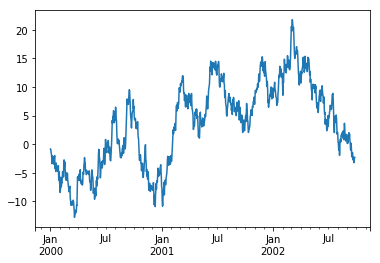

In [132]:
ts.plot()


In [134]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])


In [ ]:
 df = df.cumsum()

In [135]:
plt.figure();

<Figure size 432x288 with 0 Axes>

In [ ]:
df.plot(); 

In [ ]:
plt.legend(loc='best')

#### Getting Data In/Out

In [136]:
df.to_csv('foo.csv')

In [137]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.097109,1.296832,-0.315124,0.576285
1,2000-01-02,-0.322072,0.065987,-2.389636,0.430875
2,2000-01-03,0.487323,-1.247144,-1.259136,-0.278406
3,2000-01-04,-1.354997,-1.211986,0.576056,-0.006836
4,2000-01-05,-0.669564,-0.112613,0.614084,0.487252
5,2000-01-06,1.328134,-0.010608,0.016469,-0.638852
6,2000-01-07,0.241099,-0.198484,-1.189064,0.057675
7,2000-01-08,1.134711,-0.195419,-0.332618,-1.452475
8,2000-01-09,-1.849284,-1.416293,-0.342714,0.236104
9,2000-01-10,-0.297432,-1.429857,0.135745,1.778980


#### HDF5

In [ ]:
df.to_hdf('foo.h5','df')

In [ ]:
pd.read_hdf('foo.h5','df')

#### Excel

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')


In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])



## Pandas Memory usage

In [ ]:
dtypes = ['int64', 'float64', 'datetime64[ns]', 'timedelta64[ns]', 
          'complex128', 'object', 'bool']
n = 5000
import numpy as np
test = [(np.random.randint(100, size=n).astype(t)) for t in dtypes]
#print("Test is",test)
data = dict([ (t, np.random.randint(100, size=n).astype(t)) for t in dtypes])
#print("Data is",data)
print("Data is",type(data['complex128']))
print("Data is",data['complex128'].size)
import pandas as pd
df = pd.DataFrame(data)
df['categorical'] = df['object'].astype('category')
df.info()

## The + symbol indicates that the true memory usage could be 
#higher, because pandas does not count the memory used by values in columns with dtype=object.

In [ ]:
df.head()

Passing memory_usage=’deep’ will enable a more accurate memory usage report, that accounts for the full usage of the contained objects. This is optional as it can be expensive to do this deeper introspection.


The memory usage of each column can be found by calling the memory_usage method. This returns a Series with an index represented by column names and memory usage of each column shown in bytes. For the dataframe above, the memory usage of each column and the total memory usage of the dataframe can be found with the memory_usage method:


In [ ]:
df.info(memory_usage='deep')

In [ ]:
df.memory_usage()

In [ ]:
df.memory_usage().sum()

In [ ]:
df.memory_usage(index=False)

In [ ]:
##ESSENTIAL BASIC FUNCTIONALITY

In [ ]:
import pandas as pd
import numpy as np
index = pd.date_range('1/1/2000', periods=8)

In [ ]:
index

In [ ]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [ ]:
df = pd.DataFrame(np.random.randn(8, 3), index=index,
                  columns=['A', 'B', 'C'])

In [ ]:
df


In [ ]:
wp = pd.Panel(np.random.randn(2, 5, 4), items=['Item1', 'Item2'],
major_axis=pd.date_range('1/1/2000', periods=5),
minor_axis=['A', 'B', 'C', 'D'])


In [ ]:
wp.as_matrix()



In [ ]:
long_series = pd.Series(np.random.randn(1000))

In [ ]:
long_series.head()

In [ ]:
long_series.tail(3)

In [ ]:
df[:2]

In [ ]:
df.columns = [x.lower() for x in df.columns]


In [ ]:
df

In [ ]:
s.values

In [ ]:
df.values

In [ ]:
wp.values

In [ ]:
## Accelerated operations

In [ ]:
df = pd.DataFrame({'one' : pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
'two' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
'three' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})

In [ ]:
df

In [ ]:
row = df.iloc[1]

In [ ]:
row

In [ ]:
column = df['two']

In [ ]:
df.sub(row, axis='columns')

In [ ]:
df.sub(row, axis=1)

In [ ]:
df.sub(column, axis='index')

In [ ]:
df.sub(column, axis=0)

In [ ]:
## Furthermore you can align a level of a multi-indexed DataFrame with a Series.
dfmi = df.copy()

In [ ]:
dfmi.index = pd.MultiIndex.from_tuples([(1,'a'),(1,'b'),(1,'c'),(2,'a')],
names=['first','second'])

In [ ]:
dfmi.sub(column, axis=0, level='second')

In [ ]:
major_mean = wp.mean(axis='major')

In [ ]:
wp.sub(major_mean, axis='major')

In [ ]:
## Missing data / operations with fill values
df

In [ ]:
df2 = pd.DataFrame(np.random.randn(8, 3), index=index,
columns=['A', 'B', 'C'])

In [ ]:
df2

In [ ]:
df+df2

In [ ]:
df.add(df2, fill_value=0)

In [ ]:
df.gt(df2)

In [ ]:
df2.ne(df)

In [ ]:
# Boolean Reductions

In [ ]:
(df > 0).all()

In [ ]:
(df > 0).any()


In [ ]:
(df > 0).any().any()

In [ ]:
df.empty

In [ ]:
pd.DataFrame(columns=list('ABC')).empty

In [ ]:
pd.Series([True]).bool()

In [ ]:
pd.Series([False]).bool()

In [ ]:
pd.DataFrame([[True]]).bool()

In [ ]:
pd.DataFrame([[False]]).bool()

In [ ]:
    ## Comparing if objects are equivalent

In [ ]:
df+df == df*2

In [ ]:
(df+df == df*2).all()

In [ ]:
## Notice that the boolean DataFrame df+df == df*2 contains some False values! That is because NaNs do not
#compare as equals:

np.nan == np.nan

In [ ]:
(df+df).equals(df*2)

In [ ]:
df1 = pd.DataFrame({'col':['foo', 0, np.nan]})

In [ ]:
df2 = pd.DataFrame({'col':[np.nan, 0, 'foo']}, index=[2,1,0])

In [ ]:
df1.equals(df2)


In [ ]:
df1.equals(df2.sort_index())

A problem occasionally arising is the combination of two similar data sets where values in one are preferred over the
other. An example would be two data series representing a particular economic indicator where one is considered to
be of “higher quality”. However, the lower quality series might extend further back in history or have more complete
data coverage. As such, we would like to combine two DataFrame objects where missing values in one DataFrame
are conditionally filled with like-labeled values from the other DataFrame. The function implementing this operation
is combine_first(),

In [ ]:
## Comparing array-like objects
pd.Series(['foo', 'bar', 'baz']) == 'foo'

In [ ]:
pd.Index(['foo', 'bar', 'baz']) == 'foo'

In [ ]:
pd.Series(['foo', 'bar', 'baz']) == pd.Index(['foo', 'bar', 'qux'])

In [ ]:
pd.Series(['foo', 'bar', 'baz']) == np.array(['foo', 'bar', 'qux'])

In [ ]:
pd.Series(['foo', 'bar', 'baz']) == pd.Series(['foo', 'bar'])

In [ ]:
pd.Series(['foo', 'bar', 'baz']) == pd.Series(['foo'])

In [ ]:
np.array([1, 2, 3]) == np.array([2])

In [ ]:
np.array([1, 2, 3]) == np.array([1, 2])

In [ ]:
## Combining overlapping data sets

In [ ]:
df1 = pd.DataFrame({'A' : [1., np.nan, 3., 5., np.nan],
'B' : [np.nan, 2., 3., np.nan, 6.]})

In [ ]:
df2 = pd.DataFrame({'A' : [5., 2., 4., np.nan, 3., 7.],
'B' : [np.nan, np.nan, 3., 4., 6., 8.]})


In [ ]:
df1

In [ ]:
df2


In [ ]:
df1.combine_first(df2)

In [ ]:
combiner = lambda x, y: np.where(pd.isnull(x), y, x)

In [ ]:
df1.combine(df2, combiner)

In [ ]:
##Descriptive statistics


In [ ]:
df

In [ ]:
df.mean(0)

In [ ]:
df.mean(1)

In [ ]:
# All such methods have a skipna option signaling whether to exclude missing data (True by default):
df.sum(0, skipna=False)

In [ ]:
df.sum(axis=1, skipna=True)

In [ ]:
ts_stand = (df - df.mean()) / df.std()

In [ ]:
ts_stand.std()

In [ ]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)


In [ ]:
xs_stand.std(1)

In [ ]:
df.cumsum()

In [ ]:
np.mean(df['one'])

In [ ]:
np.mean(df['one'].values)

In [ ]:
series = pd.Series(np.random.randn(500))

In [ ]:
series[20:500] = np.nan

In [ ]:
series[10:20] = 5

In [ ]:
## Series also has a method nunique() which will return the number of unique non-null values:
series.nunique()

In [ ]:
## Summarizing data: describe

In [ ]:
series = pd.Series(np.random.randn(1000))

In [ ]:
series[::2] = np.nan


In [ ]:
series.describe()

In [ ]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=['a', 'b', 'c', 'd', 'e'])

In [ ]:
frame.loc[::2] = np.nan

In [ ]:
frame.describe()

In [ ]:
frame = pd.DataFrame({'a': ['Yes', 'Yes', 'No', 'No'], 'b': range(4)})
frame.describe(include=['object'])

In [ ]:
frame.describe(include=['number'])

In [ ]:
frame.describe(include='all')

In [ ]:
## Index of Min/Max Values

In [ ]:
s1 = pd.Series(np.random.randn(5))

In [ ]:
s1

In [ ]:
s1.idxmin(), s1.idxmax()

In [ ]:
df1 = pd.DataFrame(np.random.randn(5,3), columns=['A','B','C'])

In [ ]:
df1

In [ ]:
df1.idxmin(axis=0)

In [ ]:
df1.idxmax(axis=1)

In [ ]:
df3 = pd.DataFrame([2, 1, 1, 3, np.nan], columns=['A'], index=list('edcba'))

In [ ]:
df3

In [ ]:
df3['A'].idxmin()

In [ ]:
## Value counts (histogramming) / Mode


In [ ]:
data = np.random.randint(0, 7, size=50)

In [ ]:
data

In [ ]:
s = pd.Series(data)

In [ ]:
s.value_counts()


In [ ]:
pd.value_counts(data)

In [ ]:
s5 = pd.Series([1, 1, 3, 3, 3, 5, 5, 7, 7, 7])

In [ ]:
s5.mode()


In [ ]:
df5 = pd.DataFrame({"A": np.random.randint(0, 7, size=50),
"B": np.random.randint(-10, 15, size=50)})

In [ ]:
df5.mode()

In [ ]:
## Continuous values can be discretized using the cut() (bins based on values) and qcut() (bins based on sample
##quantiles) functions:

In [ ]:
arr = np.random.randn(20)

In [ ]:
factor = pd.cut(arr, 4)

In [ ]:
factor

In [ ]:
factor = pd.cut(arr, [-5, -1, 0, 1, 5])

In [ ]:
factor

In [ ]:
arr = np.random.randn(30)

In [ ]:
factor = pd.qcut(arr, [0, .25, .5, .75, 1])

In [ ]:
factor

In [ ]:
pd.value_counts(factor)

In [ ]:
arr = np.random.randn(20)

In [ ]:
factor = pd.cut(arr, [-np.inf, 0, np.inf])

In [ ]:
factor
